<a href="https://colab.research.google.com/github/cmclane1/Python_Analysis_of_Baltimore_Salaries/blob/main/Baltimore_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Analysis of Baltimore Salaries
Using the computing power of python allows the analysis of much larger data sets than excel. Previously I tried to do a project on this data set but it crashed excel anytime I attempted to do an edit on the entire dataset.

## Import Libararies

In [56]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import plotly.express as px

# download files to our computer
from google.colab import files


## Import Data
Data is stored in the github repository, download it into a dataframe

In [63]:
# import csv of data into a dataframe
df_salaries = pd.read_csv("https://raw.githubusercontent.com/cmclane1/Python_Analysis_of_Baltimore_Salaries/main/Baltimore_Employee_Salaries%20(1).csv")


In [58]:
# View the dataframe
df_salaries


,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
0,201,Desiree,C,Alston,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011,1
1,101,Maude,E,Akins,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011,2
2,301,Shavonna,A,Anderson,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011,3
3,51,Margaret,E,Adams,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011,4
4,1,Patricia,G,Aaron,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...
154643,154582,Shane,NaN,Young,WW Opns Tech II Sanitary,A50207,DPW-Water & Waste Water (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,154644
154644,154583,Thomas,G,Young,Police Officer EID,A99322,Police Department (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,154645
154645,154584,Valerie,K,Young,Operations Officer II,A14003,FIN-Collections (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,154646
154646,154585,Veronica,W,Young,Office Assistant III,A75014,Enoch Pratt Free Library (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,154647


In [64]:
# Clean up the data frame, add a full name field
df_salaries.columns = df_salaries.columns.str.lower()
df_salaries["firstname"] = df_salaries["firstname"] + " " + df_salaries["lastname"]
del df_salaries["lastname"]
df_salaries.rename(columns = {'firstname':'fullname'})

,id,fullname,mi,jobtitle,agencyid,agencyname,hiredate,annualsalary,grosspay,fiscalyear,objectid
0,201,Desiree Alston,C,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011,1
1,101,Maude Akins,E,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011,2
2,301,Shavonna Anderson,A,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011,3
3,51,Margaret Adams,E,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011,4
4,1,Patricia Aaron,G,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011,5
...,...,...,...,...,...,...,...,...,...,...,...
154643,154582,Shane Young,NaN,WW Opns Tech II Sanitary,A50207,DPW-Water & Waste Water (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,154644
154644,154583,Thomas Young,G,Police Officer EID,A99322,Police Department (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,154645
154645,154584,Valerie Young,K,Operations Officer II,A14003,FIN-Collections (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,154646
154646,154585,Veronica Young,W,Office Assistant III,A75014,Enoch Pratt Free Library (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,154647


### Analysis of Pay Variance
Formats for payvariance and does a simple plot with Matlibplot. Could repeat proper ploting shown below with annual salary



,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
count,14454.000000,16049.000000,15918.000000,15758.000000,13748.000000,13546.000000,12801.000000,13522.000000,13158.000000,17215.00000
mean,-3684.591536,-226.036831,713.393267,285.587338,3602.270840,2822.859184,2623.656358,3684.382028,3355.208127,533.73951
std,10285.959248,12059.262228,13333.720313,14240.791402,17137.094611,17580.372885,17859.012776,20563.838649,20772.538385,21509.49436
min,-153680.000000,-156819.030000,-183431.000000,-183690.000000,-182070.000000,-183532.500000,-183285.000000,-183105.000000,-191758.830000,-183622.50000
25%,-6844.480000,-4166.990000,-3444.690000,-5628.825000,-276.800000,-2439.332500,-2455.880000,-1490.387500,-1771.470000,-4393.25500
50%,-3494.690000,308.050000,559.665000,149.435000,1421.260000,504.020000,282.620000,1288.220000,1167.955000,440.68000
75%,-149.912500,4116.650000,5793.395000,5043.280000,8641.577500,7435.010000,8167.650000,10271.367500,10222.967500,7617.30500
max,89832.350000,127927.560000,110375.810000,100864.840000,130220.920000,141846.960000,147604.700000,149969.500000,152968.260000,219975.19000


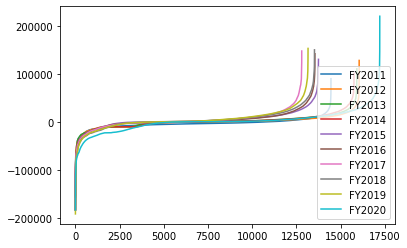

In [60]:
# Calculate the pay variance
df_salaries["payvariance"] = df_salaries["grosspay"] - df_salaries["annualsalary"]
# Move the fiscal year to the column
df_year = df_salaries.pivot(columns='fiscalyear', values='payvariance')
years = ["FY2012", "FY2013", "FY2014", "FY2015", "FY2016", "FY2017", "FY2018", "FY2019", "FY2020"]
out = pd.isnull(df_year["FY2011"])
df_final = pd.DataFrame(df_year["FY2011"][~out]).sort_values("FY2011").reset_index()
for i in years :
  out = pd.isnull(df_year[i])
  df_temp = pd.DataFrame(df_year[i][~out]).sort_values(i).reset_index()
  del df_temp["index"]
  df_final = pd.concat([df_final,df_temp], axis = 1)
del df_final["index"]
df_final.plot()
df_final.describe()




### Analysis of Gross Income
Formats for gross income and does a simple plot with Matlibplot. Could repeat proper ploting shown below with annual salary


In [ ]:
df_gross_year = df_salaries.pivot(columns='fiscalyear', values='grosspay')
years = ["FY2012", "FY2013", "FY2014", "FY2015", "FY2016", "FY2017", "FY2018", "FY2019", "FY2020"]
out = pd.isnull(df_gross_year["FY2011"])
df_gyf = pd.DataFrame(df_gross_year["FY2011"][~out]).sort_values("FY2011").reset_index()
for i in years :
  out = pd.isnull(df_gross_year[i])
  df_temp = pd.DataFrame(df_gross_year[i][~out]).sort_values(i).reset_index()
  del df_temp["index"]
  df_gyf = pd.concat([df_gyf,df_temp], axis = 1)
del df_gyf["index"]
df_gyf.plot()


### Analysis of Annual Salary
Formats for payvariance and does finds the statistics. Then a Plotly figure is made and exported

,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
count,14454.000000,16049.000000,19137.000000,18981.000000,14017.000000,13818.000000,13483.000000,13683.000000,13811.00000,17215.000000
mean,46006.618203,43398.358849,38289.855328,39756.791968,51708.083521,53032.957121,54899.880294,56751.774026,57845.28268,52628.143628
std,19903.012135,22169.834231,23617.542828,25173.051216,23366.552815,24603.168311,25137.617868,25491.250161,26934.44789,31257.593012
min,377.000000,377.000000,0.000000,0.000000,900.000000,0.000000,1800.000000,1800.000000,1750.00000,0.000000
25%,31609.000000,28668.000000,11310.000000,11310.000000,33354.000000,33613.000000,34902.000000,36399.500000,36312.00000,33238.000000
50%,43614.000000,42853.000000,35947.000000,36400.000000,48126.000000,49660.000000,50656.000000,52456.000000,53640.00000,49887.000000
75%,59916.000000,59914.000000,57000.000000,60598.000000,68112.000000,70138.000000,71412.000000,73440.000000,75806.00000,73495.000000
max,238772.000000,238772.000000,238772.000000,238772.000000,238772.000000,238772.000000,250000.000000,250000.000000,275000.00000,275000.000000


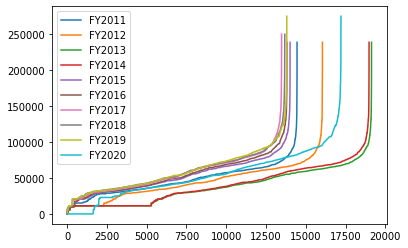

In [61]:
df_annual_year = df_salaries.pivot(columns='fiscalyear', values='annualsalary')
years = ["FY2012", "FY2013", "FY2014", "FY2015", "FY2016", "FY2017", "FY2018", "FY2019", "FY2020"]
out = pd.isnull(df_annual_year["FY2011"])
df_ayf = pd.DataFrame(df_annual_year["FY2011"][~out]).sort_values("FY2011").reset_index()
for i in years :
  out = pd.isnull(df_annual_year[i])
  df_temp = pd.DataFrame(df_annual_year[i][~out]).sort_values(i).reset_index()
  del df_temp["index"]
  df_ayf = pd.concat([df_ayf,df_temp], axis = 1)
del df_ayf["index"]
df_ayf.plot()
df_ayf.describe()

In [ ]:
# plot information using plotly and export it
df1 = df_ayf.melt(value_name='salary', var_name='year')
line=px.line(df1, y='salary', color='year', title='Annual Salary of Baltimore City Employees' )
line.update_yaxes(title_text='Annual Salary ($)')
line.update_xaxes(title_text='ith Best Paid Employee')
line.write_html("Annual_Salary_of_Baltimore_Employees.html")
files.download("Annual_Salary_of_Baltimore_Employees.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>